### Bike Accident Severity Prediction using Logistic Regression
This notebook explores a dataset related to bike accidents. The goal is to predict accident severity using features like vehicle type, road condition, and time of day. 

We will use **Logistic Regression**, a popular classification algorithm, to analyze and model this data.

Workflow Overview:
1. Importing Required Libraries  
2. Loading and Understanding the Dataset  
3. Exploratory Data Analysis (EDA)  
4. Data Cleaning & Preprocessing  
5. Encoding Categorical Variables  
6. Splitting Dataset  
7. Feature Scaling  
8. Logistic Regression Model Training  
9. Model Evaluation  
10. Conclusion  



### **Importing Required Libraries**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

#### **Loading the Dataset**

In [5]:
df = pd.read_csv(r'C:\Users\Satheesh\Desktop\accident (LOR).csv')
df

,Age,Gender,Speed_of_Impact,Helmet_Used,Seatbelt_Used,Survived
0,56,Female,27.0,No,No,1
1,69,Female,46.0,No,Yes,1
2,46,Male,46.0,Yes,Yes,0
3,32,Male,117.0,No,Yes,0
4,60,Female,40.0,Yes,Yes,0
...,...,...,...,...,...,...
195,69,Female,111.0,No,Yes,1
196,30,Female,51.0,No,Yes,1
197,58,Male,110.0,No,Yes,1
198,20,Male,103.0,No,Yes,1


### **Initial Data Exploration**

In [7]:
print(df.head())
print(df.info())
print(df.describe())

   Age  Gender  Speed_of_Impact Helmet_Used Seatbelt_Used  Survived
0   56  Female             27.0          No            No         1
1   69  Female             46.0          No           Yes         1
2   46    Male             46.0         Yes           Yes         0
3   32    Male            117.0          No           Yes         0
4   60  Female             40.0         Yes           Yes         0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              200 non-null    int64  
 1   Gender           199 non-null    object 
 2   Speed_of_Impact  197 non-null    float64
 3   Helmet_Used      200 non-null    object 
 4   Seatbelt_Used    200 non-null    object 
 5   Survived         200 non-null    int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 9.5+ KB
None
             Age  Speed_of_Impact   Survived
count  2

### **Missing Values & Data Cleaning**

In [9]:
print(df.isnull().sum())

Age                0
Gender             1
Speed_of_Impact    3
Helmet_Used        0
Seatbelt_Used      0
Survived           0
dtype: int64


In [10]:
df = df.dropna()

In [11]:
df

,Age,Gender,Speed_of_Impact,Helmet_Used,Seatbelt_Used,Survived
0,56,Female,27.0,No,No,1
1,69,Female,46.0,No,Yes,1
2,46,Male,46.0,Yes,Yes,0
3,32,Male,117.0,No,Yes,0
4,60,Female,40.0,Yes,Yes,0
...,...,...,...,...,...,...
195,69,Female,111.0,No,Yes,1
196,30,Female,51.0,No,Yes,1
197,58,Male,110.0,No,Yes,1
198,20,Male,103.0,No,Yes,1


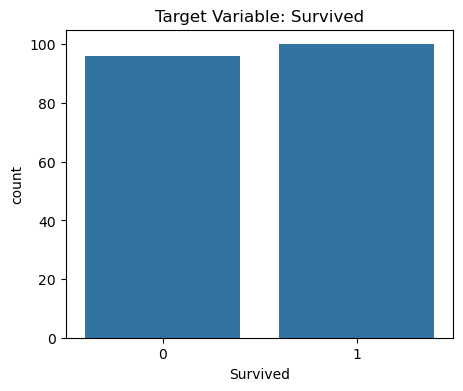

In [12]:
plt.figure(figsize=(5, 4))
sns.countplot(x='Survived', data=df)
plt.title('Target Variable: Survived')
plt.show()

In [13]:
df

,Age,Gender,Speed_of_Impact,Helmet_Used,Seatbelt_Used,Survived
0,56,Female,27.0,No,No,1
1,69,Female,46.0,No,Yes,1
2,46,Male,46.0,Yes,Yes,0
3,32,Male,117.0,No,Yes,0
4,60,Female,40.0,Yes,Yes,0
...,...,...,...,...,...,...
195,69,Female,111.0,No,Yes,1
196,30,Female,51.0,No,Yes,1
197,58,Male,110.0,No,Yes,1
198,20,Male,103.0,No,Yes,1


### **Encoding Categorical Variables**

In [15]:
categorical_cols = ['Gender', 'Helmet_Used', 'Seatbelt_Used']
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_array = encoder.fit_transform(df[categorical_cols])
encoded_columns = encoder.get_feature_names_out(categorical_cols)
df_encoded = pd.DataFrame(encoded_array, columns=encoded_columns)

In [16]:
df = df.drop(columns=categorical_cols).reset_index(drop=True)
df = pd.concat([df, df_encoded], axis=1)


In [17]:
numerical_cols = ['Age', 'Speed_of_Impact']
scaler = StandardScaler()
scaled_cols = pd.DataFrame(scaler.fit_transform(df[numerical_cols]), columns=numerical_cols)

In [18]:
type(categorical_cols)

list

In [19]:
x = pd.concat([df_encoded, scaled_cols], axis=1)
y = df['Survived']

### **Splitting the Dataset**

We split the data into **training** and **testing** sets to evaluate model performance.

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.8, random_state=42)

#### **Model Training - Logistic Regression**

Train a Logistic Regression model on the preprocessed data to predict accident severity.

In [22]:
LOR = LogisticRegression()
LOR.fit(x_train, y_train)
y_pred = LOR.predict(x_test)
y_prob = LOR.predict_proba(x_test)[:, 1]

In [23]:
LOR.fit(x_train,y_train)

LogisticRegression()

In [24]:
y_pred= LOR.predict(x_test)
y_pred

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1], dtype=int64)

#### **Model Evaluation**

We evaluate the model using:
- Accuracy Score
- Confusion Matrix
- Classification Report
- ROC Curve & AUC

In [25]:
acc=accuracy_score(y_test,y_pred)
acc

0.5

In [26]:
classification = classification_report(y_test,y_pred)
print(classification)

              precision    recall  f1-score   support

           0       0.73      0.32      0.44        25
           1       0.41      0.80      0.55        15

    accuracy                           0.50        40
   macro avg       0.57      0.56      0.49        40
weighted avg       0.61      0.50      0.48        40



In [27]:
conf = confusion_matrix(y_test,y_pred)
print(conf)

[[ 8 17]
 [ 3 12]]


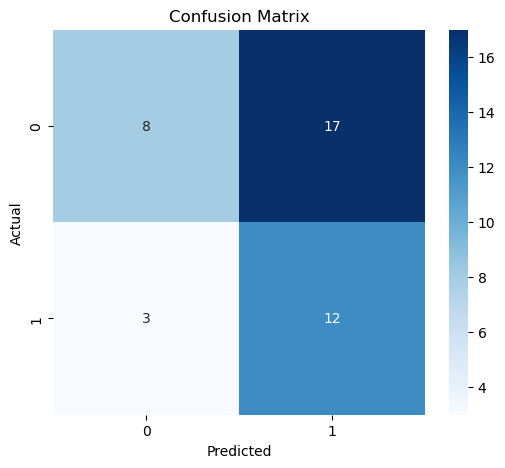

In [28]:
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [29]:
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

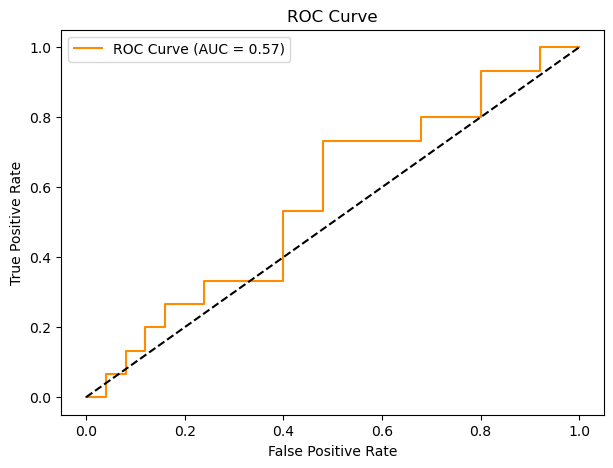

In [30]:
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

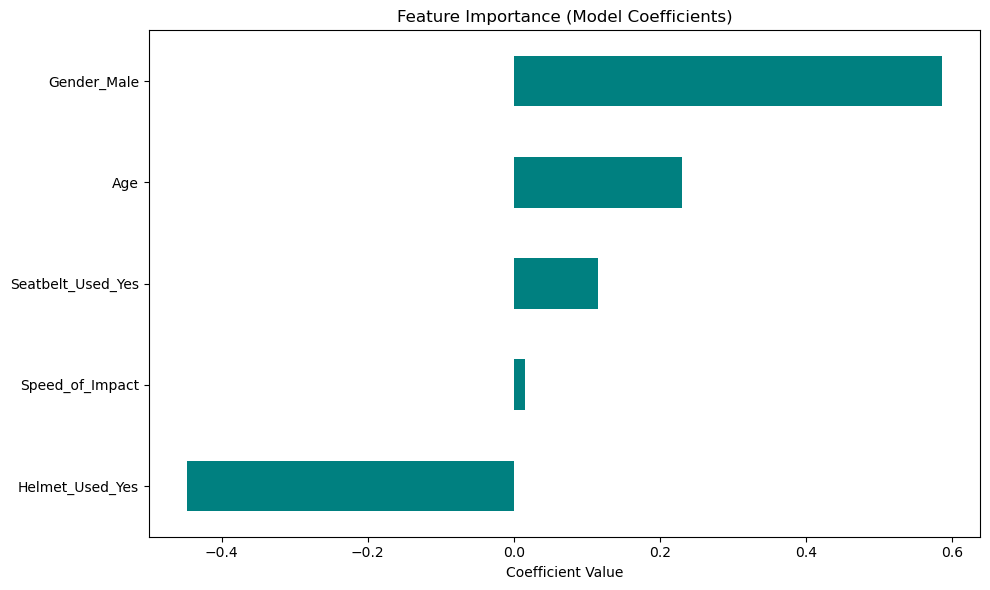

In [35]:
feature_names = x.columns
coefficients = pd.Series(LOR.coef_[0], index=feature_names)
coefficients.sort_values().plot(kind='barh', figsize=(10, 6), color='teal')
plt.title('Feature Importance (Model Coefficients)')
plt.xlabel('Coefficient Value')
plt.tight_layout()
plt.show()